In [89]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 28 03:40:36 2020

@author: kimjong-gyu
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from scipy import stats, polyval




train=pd.read_csv('https://drive.google.com/uc?export=download&id=1KA7mKUmQv4PrF-qMFrH35LN6q_i56Bf1', dtype={'StateHoliday':'str'})
store=pd.read_csv('https://drive.google.com/uc?export=download&id=1_o04Vnqzo3v-MTk20MF3OMw2QFz0Fbo0')

#문이열려있는데 판매량이 0인 데이터 제거
train2=train[(train['Open']==1)&(train['Sales']>0)]
train2


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [90]:
# merge two set
train_store = pd.merge(train2, store, how = 'inner', on = 'Store')

train_store.isnull().sum()
#prom2 value is 0 -> promo2 SinceWeek and prom2SiceYear value Nan So i delete these variables
train_store=train_store.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd57e5cb9d0>,
      dtype=object)

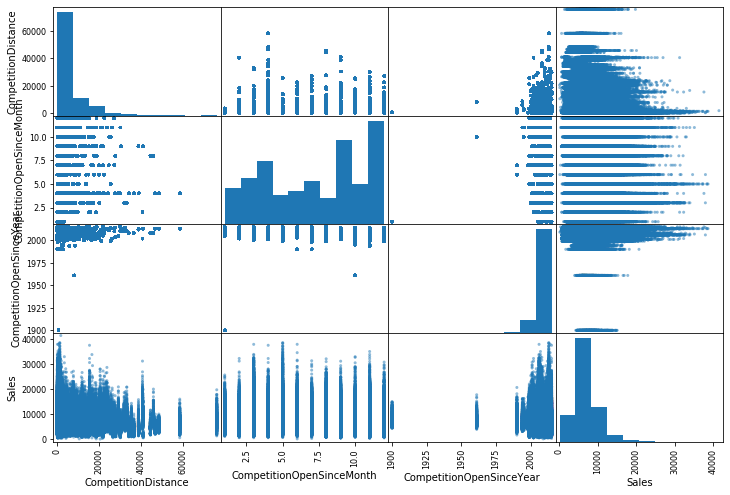

In [36]:
#scatter plot 
In_condition=['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Sales']
scatter_matrix(train_store[In_condition],figsize=(12,8))


In [91]:
#competition distance -> competiion o or x 
#variable related of competition value to-> there is competition market or not
train_store['CompetitionDistance'][train_store['CompetitionDistance'] > 0] = 1
train_store['CompetitionDistance'][train_store['CompetitionDistance'] == 0] = 0
train_store=train_store.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis=1)


/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [92]:
# fill nan value to 0
train_store.fillna(0, inplace = True)

train_store


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01-07,9291,1002,1,1,0,0,a,a,1.0,0
844334,292,6,2013-01-05,2748,340,1,0,0,0,a,a,1.0,0
844335,292,5,2013-01-04,4202,560,1,0,0,1,a,a,1.0,0
844336,292,4,2013-01-03,4580,662,1,0,0,1,a,a,1.0,0


In [93]:
train_store.groupby('StoreType')['Sales'].describe()
train_store.groupby('StoreType')['Customers', 'Sales'].sum()

# b가 가장 높은 평균판매량 
train_store.groupby('StoreType')['Sales'].describe()

/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,457042.0,6925.697986,3277.351589,46.0,4695.25,6285.0,8406.00,41551.0
b,15560.0,10233.380141,5155.729868,1252.0,6345.75,9130.0,13184.25,38722.0
c,112968.0,6933.126425,2896.958579,133.0,4916.00,6408.0,8349.25,31448.0
d,258768.0,6822.300064,2556.401455,538.0,5050.00,6395.0,8123.25,38037.0


In [94]:

#판매 및 고객의 전체 합계를 인쇄하여 가장 많이 판매되고 혼잡 한 StoreType을 확인하십시오. 
# type A 가 가장 높다 
train_store.groupby('StoreType')['Customers', 'Sales'].sum()
#later using more simply devide Date 
train_store['Month']=train_store['Date'].apply(lambda x:int(x[5:7]))
train_store['Year']=train_store['Date'].apply(lambda x:int(x[0:4]))
train_store['Day']=train_store['Date'].apply(lambda x:int(x[8:10]))

#sales per customer
train_store['SalePerCustomer']=train_store['Sales']/train_store['Customers']
train_store['SalePerCustomer'].describe()

/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


count    844338.000000
mean          9.493641
std           2.197448
min           2.749075
25%           7.895571
50%           9.250000
75%          10.899729
max          64.957854
Name: SalePerCustomer, dtype: float64

/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


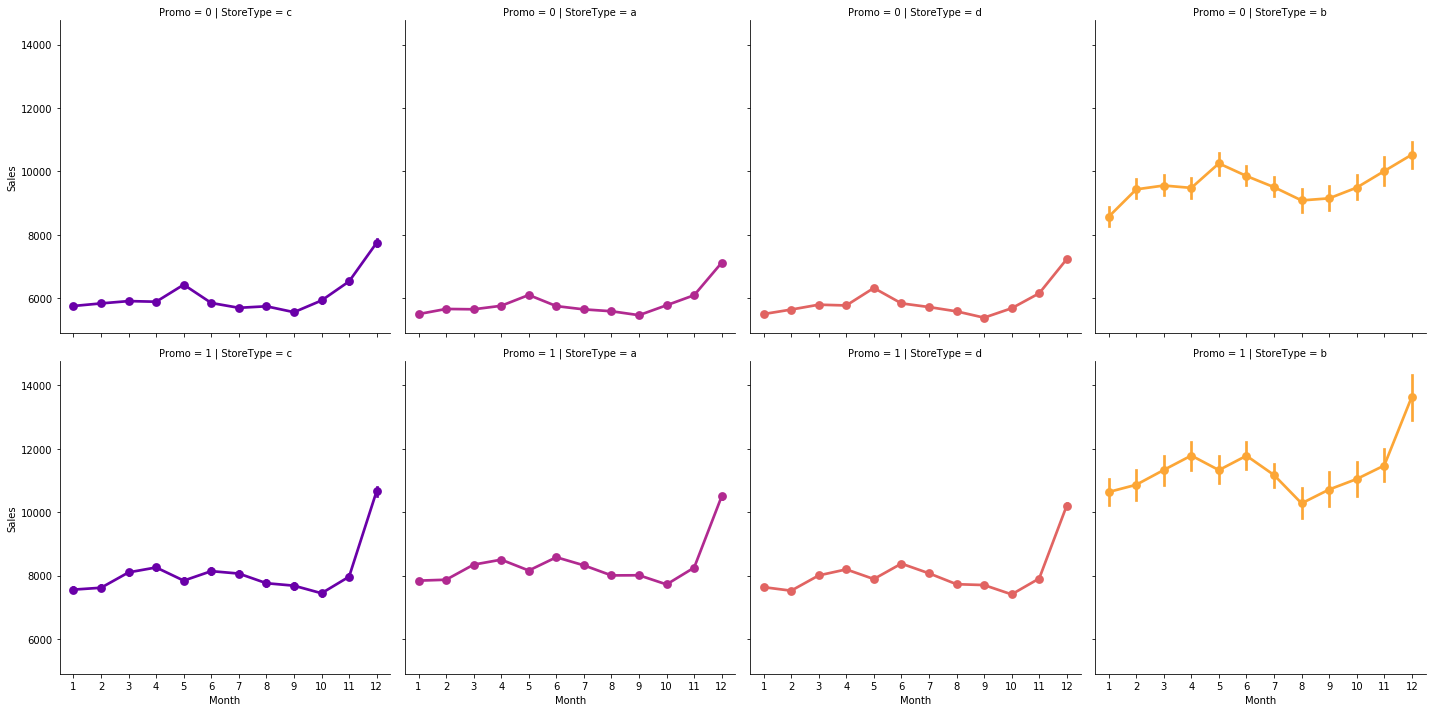

In [18]:
# sales trends 
sns.factorplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo' # per promo in the store in rows
               )


/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


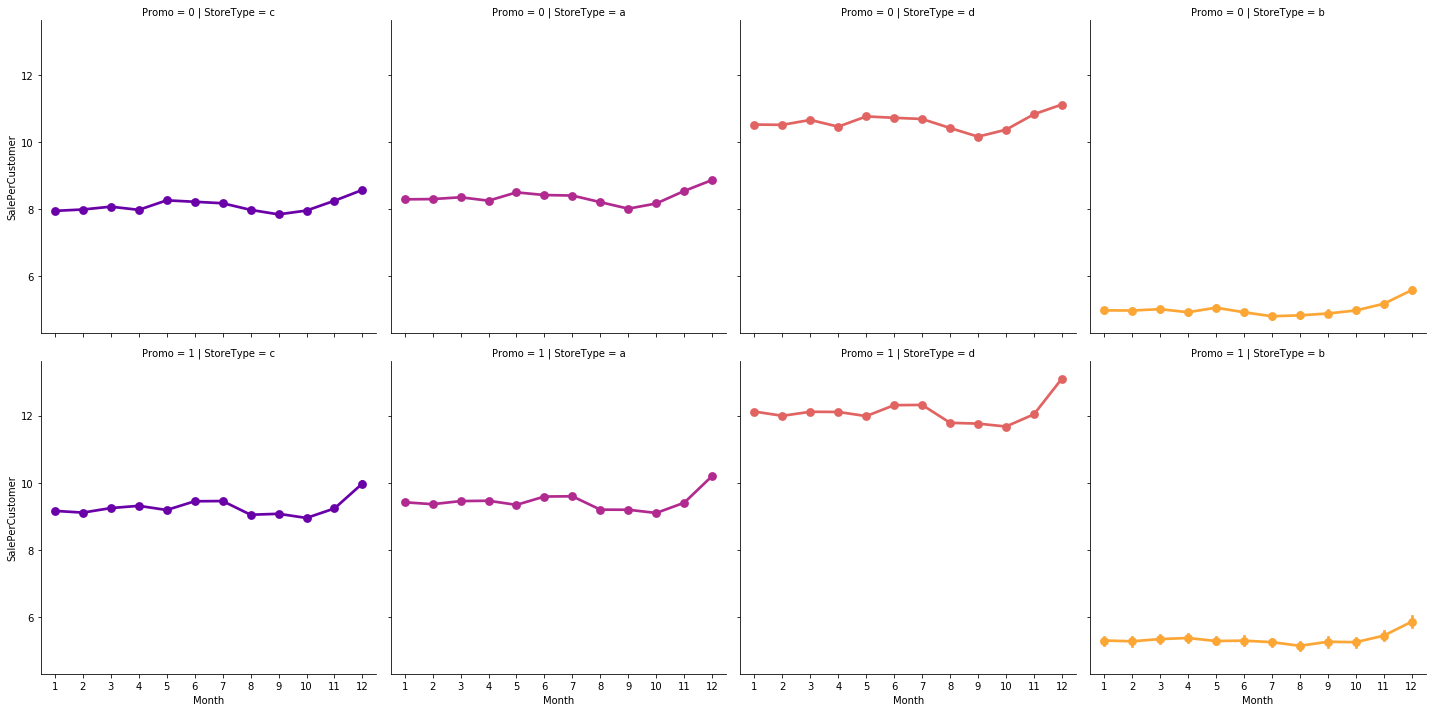

In [19]:

#sales per customer
train_store['SalePerCustomer']=train_store['Sales']/train_store['Customers']
train_store['SalePerCustomer'].describe()

# sale per customer trends
sns.factorplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo' # per promo in the store in rows
               )


In [95]:
# 순위가 a d c b 
# 1등 A type 2등 D type 3등 b type 4등 c type 
train_store['StoreType'] = train_store['StoreType'].map({'a':'4','d':'3','b':'2','c':'1'})
train_store=train_store.astype({'StoreType':'int'})
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month,Year,Day,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,1,a,1.0,0,7,2015,31,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,1,a,1.0,0,7,2015,30,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,1,a,1.0,0,7,2015,29,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,1,a,1.0,0,7,2015,28,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,1,a,1.0,0,7,2015,27,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01-07,9291,1002,1,1,0,0,4,a,1.0,0,1,2013,7,9.272455
844334,292,6,2013-01-05,2748,340,1,0,0,0,4,a,1.0,0,1,2013,5,8.082353
844335,292,5,2013-01-04,4202,560,1,0,0,1,4,a,1.0,0,1,2013,4,7.503571
844336,292,4,2013-01-03,4580,662,1,0,0,1,4,a,1.0,0,1,2013,3,6.918429


In [96]:
#assortment level c-> 3 , b->2 , a->1
train_store['Assortment'] = train_store['Assortment'].map({'a':'1','b':'2','c':'3'})
train_store=train_store.astype({'Assortment':'int'})
train_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month,Year,Day,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,1,1,1.0,0,7,2015,31,9.482883
1,1,4,2015-07-30,5020,546,1,1,0,1,1,1,1.0,0,7,2015,30,9.194139
2,1,3,2015-07-29,4782,523,1,1,0,1,1,1,1.0,0,7,2015,29,9.143403
3,1,2,2015-07-28,5011,560,1,1,0,1,1,1,1.0,0,7,2015,28,8.948214
4,1,1,2015-07-27,6102,612,1,1,0,1,1,1,1.0,0,7,2015,27,9.970588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01-07,9291,1002,1,1,0,0,4,1,1.0,0,1,2013,7,9.272455
844334,292,6,2013-01-05,2748,340,1,0,0,0,4,1,1.0,0,1,2013,5,8.082353
844335,292,5,2013-01-04,4202,560,1,0,0,1,4,1,1.0,0,1,2013,4,7.503571
844336,292,4,2013-01-03,4580,662,1,0,0,1,4,1,1.0,0,1,2013,3,6.918429


In [97]:
# integrated holiday
train_store['StateHoliday'][train_store['StateHoliday']!=0] = 1

/Users/kimjong-gyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
#divide test model and train model 

#Validation and train
train_store_L=train_store.drop(['Date','Month','Day','Store'],axis=1)
test_value=train_store_L[(train_store['Year']==2015)]
train_value=train_store_L[(train_store['Year']!=2015)]

trainY=train_value['Sales']
trainX=train_value.drop(['Year','Sales'],axis=1).values

valY=test_value['Sales']
valX=test_value.drop(['Year','Sales'],axis=1).values


[2418.4560259  6123.51714549 6170.88199154 ... 4036.94430579 4435.81531625
 4997.37748597]
0.9060485877123193


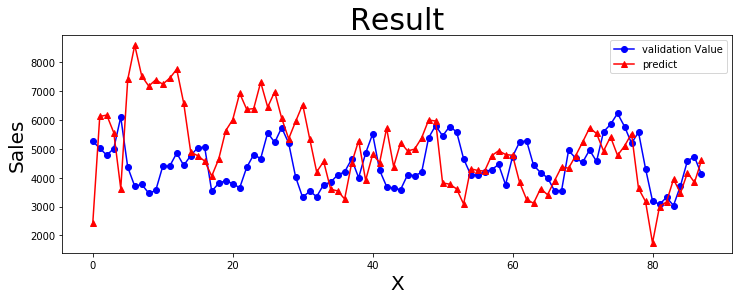

In [75]:
#linear regression
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(trainX, trainY)
pred=mlr.predict(trainX)
print(mlr.predict(trainX))
print(mlr.score(valX,valY))

fig = plt.figure( figsize = (12, 4)) 
graph = fig.add_subplot(1,1,1) 
graph.plot(valY[:88], marker='o', color='blue', label='validation Value') 
graph.plot(pred[:88], marker='^', color='red', label='predict')
graph.set_title('Result', size=30) 
plt.xlabel('X', size=20)
plt.ylabel('Sales', size=20) 
plt.legend(loc = 'best')


In [99]:
#KNeighborsRegressor

from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(trainX, trainY)
print("테스트 세트 예측:\n{}".format(reg.predict(valX)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(valX, valY)))


테스트 세트 예측:
[5180.         4795.         4720.         ... 8754.66666667 2609.
 5016.33333333]
테스트 세트 R^2: 0.98


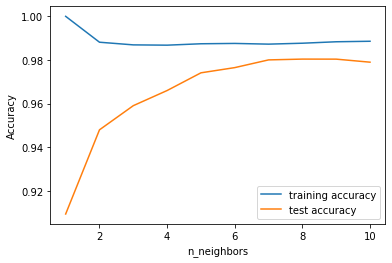

In [104]:



training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(trainX, trainY)
    # record training set accuracy
    training_accuracy.append(clf.score(trainX[:200], trainY[:200]))
    # record test set accuracy
    test_accuracy.append(clf.score(valX[:100], valY[:100]))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()